# Case: Marketing Cartão

**Uma instuição financeira, emissora de Cartão de Crédito, deseja segmentar seus clientes para
implementar estratégias de atendimento e relacionamento diferenciados de acordo com o uso do
produto cartão de crédito. Dentre as variáveis transacionais disponíveis, quais poderiam ser escolhidas
parar representar o “uso do cartão de crédito”? Quantos segmentos existem na carteira de clientes? A
base disponibilizadas é uma amostra de aproximadamente 1% dos clientes da emissora de cartão.**

*Fonte Adaptada: https://www.kaggle.com/mirichoi0218/insurance*

![image]('Aula 15.12.2020 - Análise de Cluster/exp_var_business_case.jpg')

In [1]:
#Importando as biliotecas

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import single, dendrogram, complete, average, ward, centroid, cut_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
#Lendo a base de dados

df = pd.read_excel('Cartao_Credito_BusinessCase.xlsx', sheet_name='Base de Dados')
df.head()

,Cod_Cliente,LIMITE_DISP_T0,LIMITE_TOTAL_T0,PERC_USO_LIMITE_T0,PERC_FAT_CARTAO_12M,QTDE_TRANSACAO_3M,VALOR_FATURA_T0
0,1,40.900749,1000.0,0.959099,0.833333,2.0,201.802084
1,2,3202.467416,7000.0,0.542505,0.916667,NaN,4103.032597
2,3,2495.148862,7500.0,0.667313,1.000000,12.0,622.066742
3,5,817.714335,1200.0,0.318571,1.000000,1.0,678.334763
4,6,1809.828751,1800.0,-0.005460,1.000000,8.0,1400.057770


In [3]:
#Excluindo a variável código do cliente
df = df.drop('Cod_Cliente', axis=1)

In [4]:
#Verificando a quantidade de dados, tipos e quantidade de missing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LIMITE_DISP_T0       8777 non-null   float64
 1   LIMITE_TOTAL_T0      8777 non-null   float64
 2   PERC_USO_LIMITE_T0   8777 non-null   float64
 3   PERC_FAT_CARTAO_12M  8777 non-null   float64
 4   QTDE_TRANSACAO_3M    6734 non-null   float64
 5   VALOR_FATURA_T0      8777 non-null   float64
dtypes: float64(6)
memory usage: 411.5 KB


In [5]:
#Quantidade de dados missing
df.QTDE_TRANSACAO_3M.isnull().sum()

2043

In [6]:
#Substituir 'na' para 0
df.QTDE_TRANSACAO_3M = df.QTDE_TRANSACAO_3M.replace(np.nan, 0)

In [7]:
#  Após a substituição dos dados missing na variável QTDE_TRANSACAO_3M, 
#podemos verificar que não há mais valores missing na base de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8777 entries, 0 to 8776
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LIMITE_DISP_T0       8777 non-null   float64
 1   LIMITE_TOTAL_T0      8777 non-null   float64
 2   PERC_USO_LIMITE_T0   8777 non-null   float64
 3   PERC_FAT_CARTAO_12M  8777 non-null   float64
 4   QTDE_TRANSACAO_3M    8777 non-null   float64
 5   VALOR_FATURA_T0      8777 non-null   float64
dtypes: float64(6)
memory usage: 411.5 KB


In [8]:
#Descrição dos dados após a substituição dos missing
df.describe()

,LIMITE_DISP_T0,LIMITE_TOTAL_T0,PERC_USO_LIMITE_T0,PERC_FAT_CARTAO_12M,QTDE_TRANSACAO_3M,VALOR_FATURA_T0
count,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000
mean,1581.318195,4503.227541,0.607069,0.886408,14.843682,1767.304140
std,2088.566418,3647.388151,0.390065,0.227311,25.028870,2913.114936
min,0.000000,50.000000,-14.909951,0.000000,0.000000,0.000000
25%,134.961317,1550.000000,0.277378,0.916667,1.000000,407.022337
50%,894.357857,3000.000000,0.691348,1.000000,7.000000,879.902552
75%,2074.364799,6500.000000,0.955843,1.000000,17.000000,1927.992694
max,19043.138560,30000.000000,1.000000,1.000000,358.000000,50721.483360


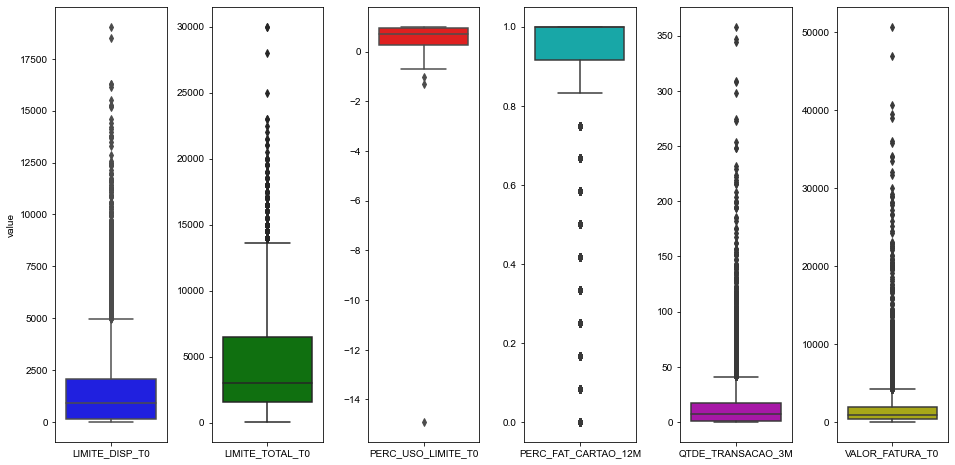

In [9]:
fig, axes = plt.subplots(1, 6, figsize = (16,8)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.4) #ajustando as distâncias estre os gráficos


colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

for i, col in enumerate(df.columns):
    
    #ploting the boxplots
    sns.set_style(style = 'white')
    sns.boxplot(ax= axes[i], data=df[[col]].melt() , x ='variable', y = 'value', color=colors[i])
    axes[i].set_xlabel('')
    if i > 0:
        axes[i].set_ylabel('')

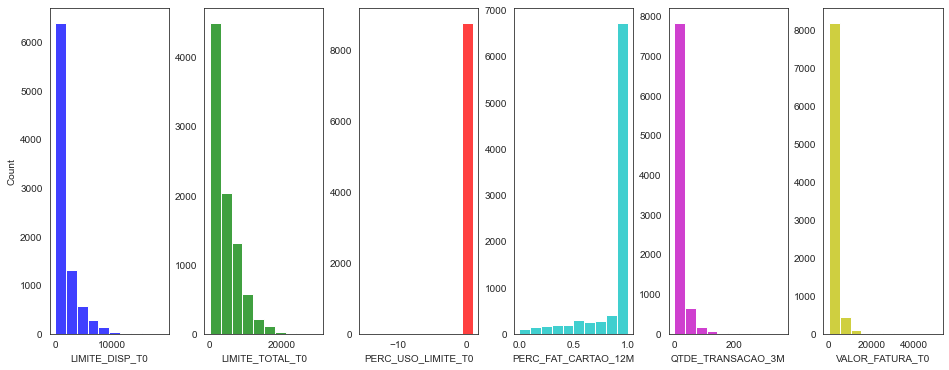

In [10]:
fig, axes = plt.subplots(1, 6, figsize = (16,6)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.3) #ajustando as distâncias estre os gráficos

colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

for i, col in enumerate(df.columns):
    #plotando os histogramas
    sns.histplot(df[col], kde = 0, ax=axes[i], bins=10 ,stat='count', color=colors[i])
    
    if i > 0:
        axes[i].set_ylabel('')

Como podemos ver os dados possuem grande quantidade de *outliers*, uma forma para tratar esse tipo de variável é a limitação dos menores valores ao valor do percentil 1% e dos maiores ao percentil 99%. Desta forma, não altermos em grande escala os dados e tratamos os dados extremos.

In [11]:
for i in df.columns: #Realizando a operação em todas as variáveis
    
    #Substituindo o valor menores que o percentil 1% pelo valor do mesmo
    df[i].loc[df[i] < np.percentile(df[i], 1)] = np.percentile(df[i], 1)
    
    #Substituindo o valor maires que o percentil 99% pelo valor do mesmo
    df[i].loc[df[i] > np.percentile(df[i], 99)] = np.percentile(df[i], 99)
    
df.describe()

,LIMITE_DISP_T0,LIMITE_TOTAL_T0,PERC_USO_LIMITE_T0,PERC_FAT_CARTAO_12M,QTDE_TRANSACAO_3M,VALOR_FATURA_T0
count,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000
mean,1557.594459,4483.089681,0.609993,0.886854,14.279253,1682.781360
std,1972.541381,3559.465237,0.350106,0.225646,21.109507,2264.893929
min,0.913030,500.000000,-0.057007,0.083333,0.000000,24.296152
25%,134.961317,1550.000000,0.277378,0.916667,1.000000,407.022337
50%,894.357857,3000.000000,0.691348,1.000000,7.000000,879.902552
75%,2074.364799,6500.000000,0.955843,1.000000,17.000000,1927.992694
max,9354.463395,17000.000000,0.999778,1.000000,117.000000,13670.984370


Podemos perceber que houve uma diminuição no número de *outliers*, conforme pode ser observado nos boxplots e histogramas abaixo.

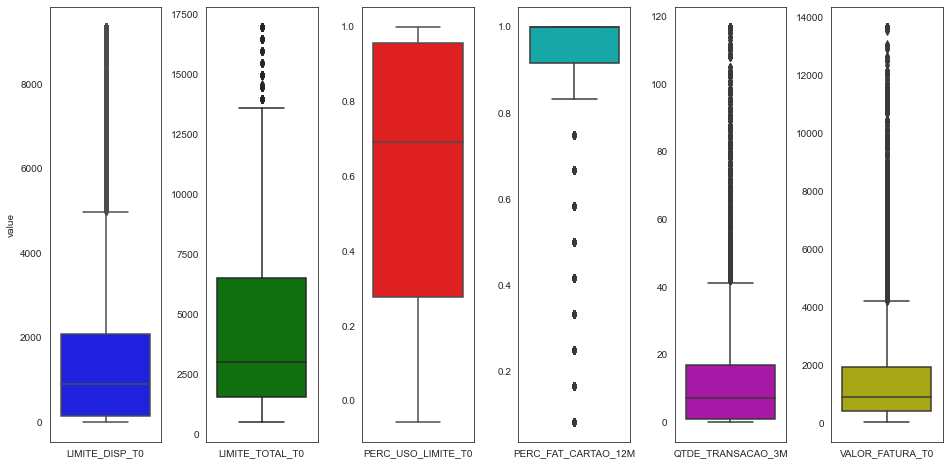

In [12]:
fig, axes = plt.subplots(1, 6, figsize = (16,8)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.4) #ajustando as distâncias estre os gráficos


colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

for i, col in enumerate(df.columns):
    
    #ploting the boxplots
    sns.set_style(style = 'white')
    sns.boxplot(ax= axes[i], data=df[[col]].melt() , x ='variable', y = 'value', color=colors[i])
    axes[i].set_xlabel('')
    if i > 0:
        axes[i].set_ylabel('')

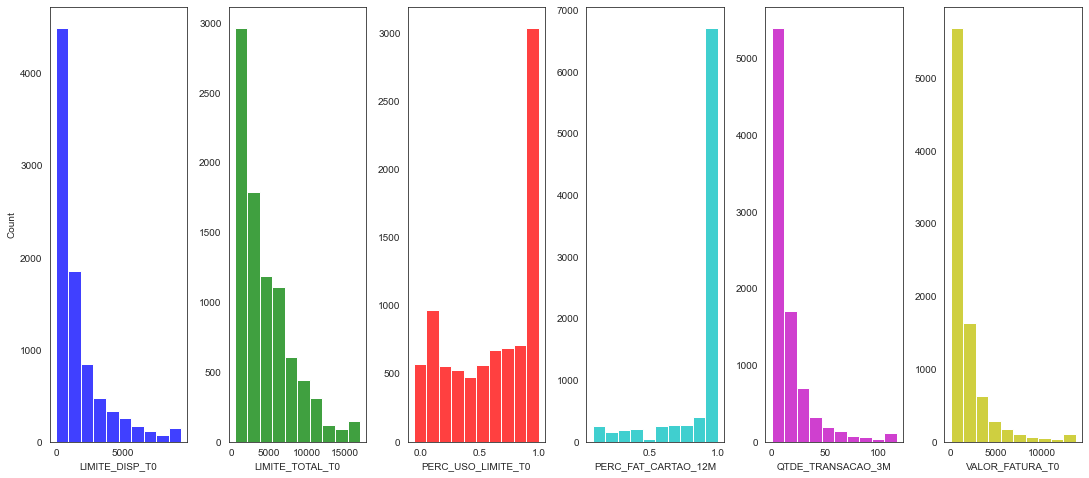

In [13]:
fig, axes = plt.subplots(1, 6, figsize = (18.5,8)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.3) #ajustando as distâncias estre os gráficos

colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

for i, col in enumerate(df.columns):
    #plotando os histogramas
    sns.histplot(df[col], kde = 0, ax=axes[i], bins=10 ,stat='count', color=colors[i])
    
    if i > 0:
        axes[i].set_ylabel('')

Todavia, apesar do tratamento da base completa temos um estado em que os ainda continuam ter uma grande quantidade de *outliers*, mas para esse estudo é normal pois sempre que trabalhamos com dados financeiros ocorre esse fato.

Para realizarmos o processo de clusterização necessitamos a avaliação se as variáveis tem correlação entre si, pois se utilizarmos dados que são altamente correlacionadas o nosso modelo irá tender a priorizar os mais correlacionados.

<AxesSubplot:>

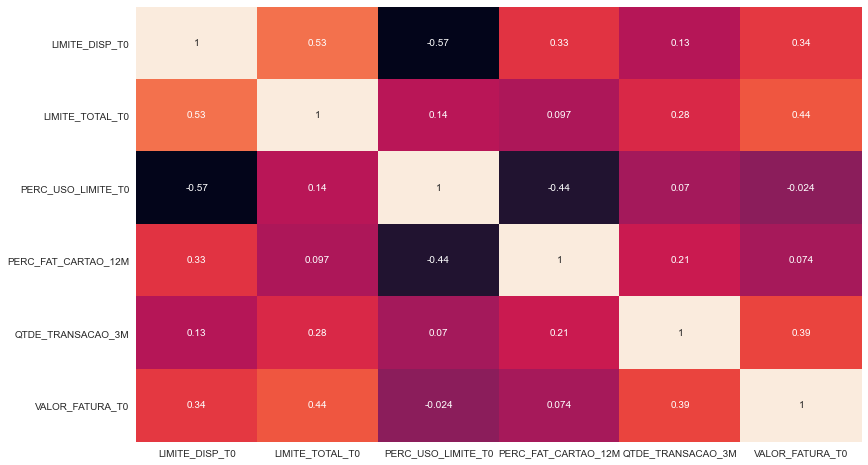

In [14]:
plt.figure(figsize=(13,8))
sns.heatmap(data=df.corr(), cbar=False, annot= True)

Observando os correlações escolhemos 3 variáveis para utilizarmos no processo de clusterização: PERC_USO_LIMITE_TO, QTDE_TRANSACAO_3M e VALOR_FATURA_TO.

Iremos segmentar utilizando os seguintes métodos hierárquicos: single, complete, average, centroid e ward, além do método espacial K-Means.

In [15]:
#Criando um dataframe com as variáveis que serão utilizadas
df_cluster = df[['PERC_USO_LIMITE_T0', 'QTDE_TRANSACAO_3M', 'VALOR_FATURA_T0']]

Antes de qualquer processo de segmentação precisamos padronizar todas as variáveis, ou seja, trazer para a mesma base que faça sentido calcular as distâncias entre diferentes dados.

In [16]:
#Padronizando as variáveis
scaler = StandardScaler()

base_std = scaler.fit_transform(df_cluster)

### Método Single

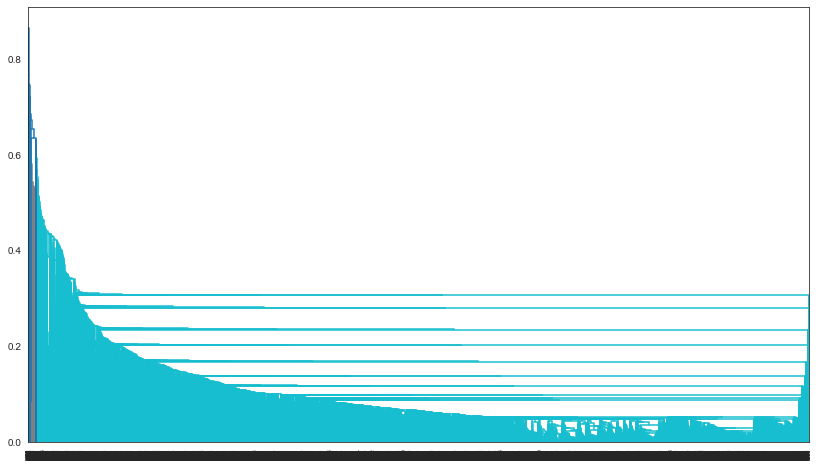

In [17]:
#Aplicando o método single na base padronizada
Z_single = single(base_std)

#Plotando o dendograma
plt.figure(figsize = (14,8))
sng_dend = dendrogram(Z_single)

### Método Complete

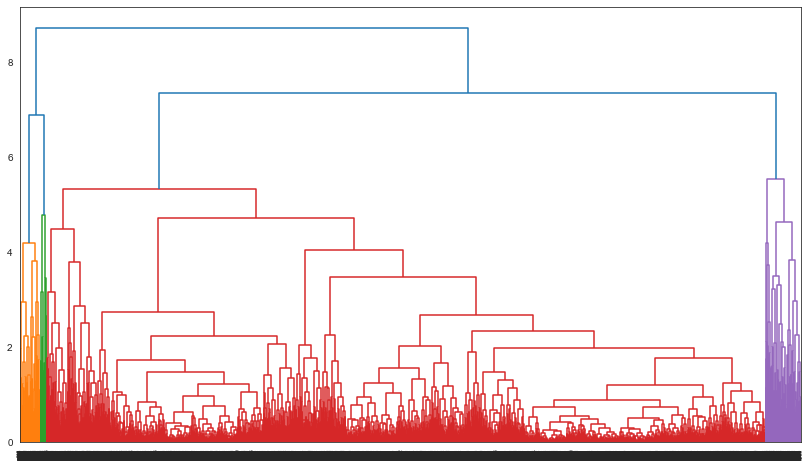

In [18]:
#Aplicando o método complete na base padronizada
Z_complete = complete(base_std)

#Plotando o dendograma
plt.figure(figsize = (14,8))
complete_dend = dendrogram(Z_complete)

### Método Average

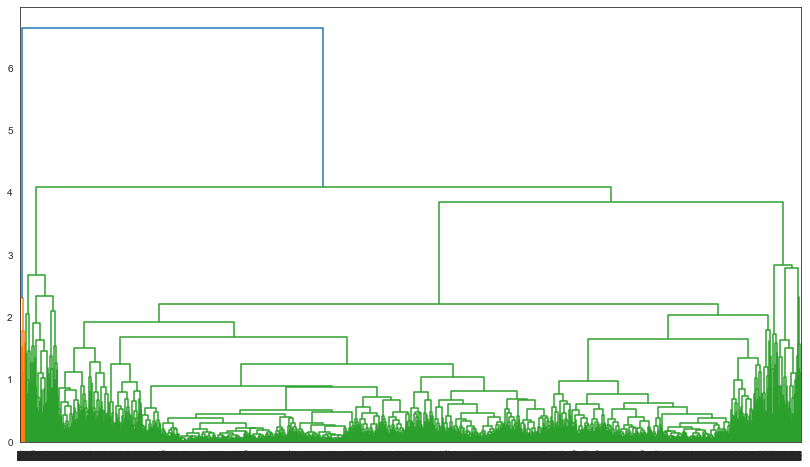

In [19]:
#Aplicando o método average na base padronizada
Z_avg = average(base_std)

#Plotando o dendograma
plt.figure(figsize = (14,8))
avg_dend = dendrogram(Z_avg)

### Método Centroid

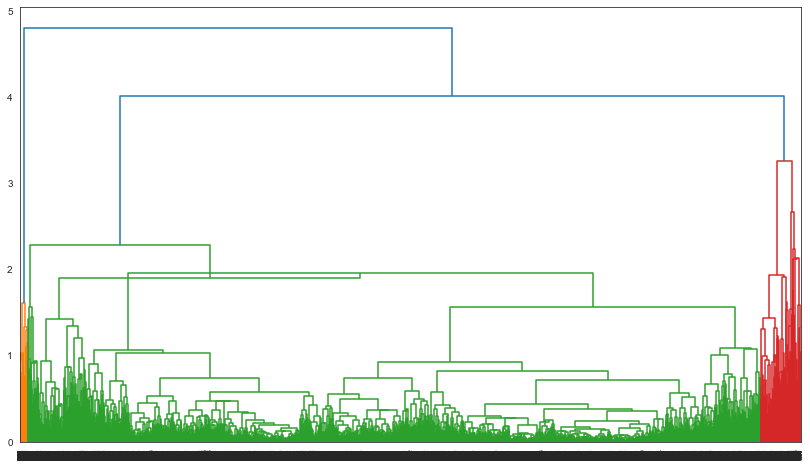

In [20]:
#Aplicando o método average na base padronizada
Z_cent = centroid(base_std)

#Plotando o dendograma
plt.figure(figsize = (14,8))
cent_dend = dendrogram(Z_cent)

### Método Ward

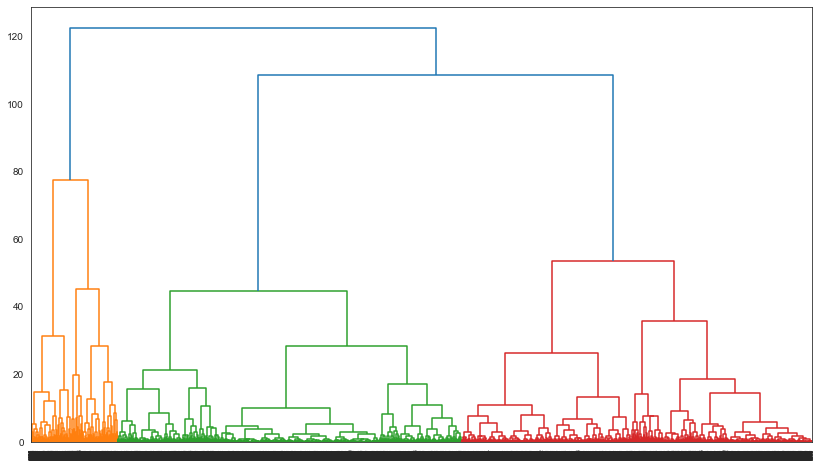

In [21]:
#Aplicando o método single na base padronizada
Z_ward = ward(base_std)

#Plotando o dendograma
plt.figure(figsize = (14,8))
ward_dend = dendrogram(Z_ward)

### Método K-Means

Para realização do método k-means (k-médias) temos que inicialmente informar qual é a quantidade de clusteres em que queremos segmentar a base, para definirmos isso utilizarmos isso utilizamos a método de cutuvelo (Elbow Method). O que significa que vamos escolher a quantidade de clusters baseando-se no ponto onde a redução da distâncias intra-cluster começar a diminuir, ou seja, buscar o joelho da curva.

In [22]:
#Rodando o k-means para construção da cuva

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, tol=1e-7, max_iter=1000000)
    kmeanModel.fit(base_std)
    distortions.append(kmeanModel.inertia_)

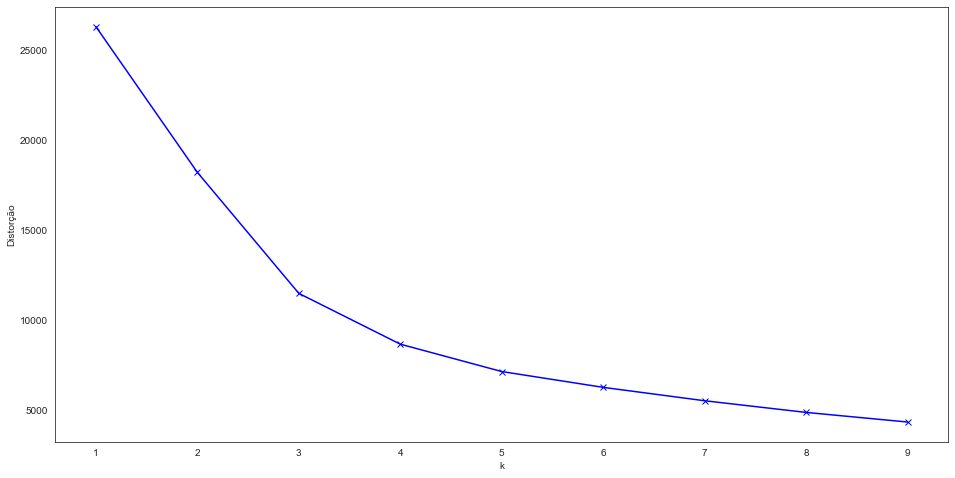

In [23]:
#Plotando a curva 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorção')
plt.show()

Para esse caso utilizaremos 3 clusters.

In [32]:
kmeanModel = KMeans(n_clusters=4, tol = 1e-5, max_iter=1000)
kmeanModel.fit(base_std)

KMeans(max_iter=1000, n_clusters=4, tol=1e-05)

In [33]:
df_cluster['cluster'] = kmeanModel.predict(base_std)

<ipython-input-33-fbba6695250d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeanModel.predict(base_std)


In [34]:
#Reduzindo as dimensões para plotarmos o gráfico
pca = PCA(2)

plot_df = pd.DataFrame(pca.fit_transform(base_std),
                       columns=['dim1', 'dim2'])
plot_df['Cluster'] = kmeanModel.predict(base_std)
plot_df.head()

,dim1,dim2,Cluster
0,-0.786030,-1.062125,0
1,0.251127,0.416623,1
2,-0.390400,-0.237392,0
3,-0.826952,0.775594,1
4,-0.446856,1.722437,1


<AxesSubplot:title={'center':'Representação gráfica dos clusters (K-Means)'}, xlabel='dim1', ylabel='dim2'>

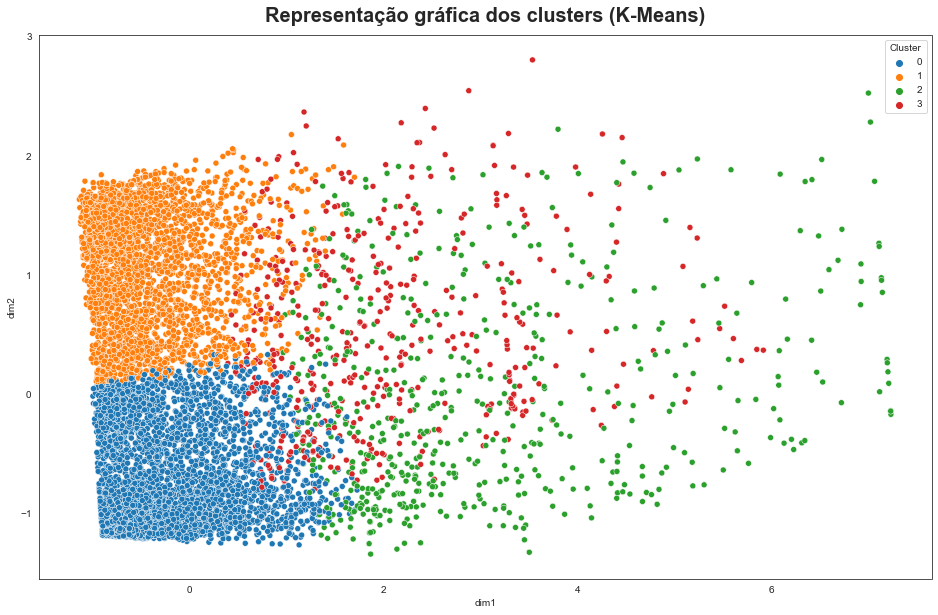

In [35]:
#Configurando a figura que será apresentada na tela
plt.figure(figsize=(16,10))
plt.title('Representação gráfica dos clusters (K-Means)',
         fontdict= {'fontsize': 20, 'fontweight': 700}, pad=13)

#Plotando o scatterplot com a marcação dos clusters
sns.scatterplot(data=plot_df, x='dim1', y='dim2', hue='Cluster', palette= "tab10")

## Análise das Segmentações

Vamos comparar dois métodos de separação: Ward (hierárquico) e K-Means. Vamos verificar se os resultados dessas metodologias apresentam melhor segmentação pensando no problema de négocio. Sendo assim, usaremos a separação de 3 clusters para ambos os métodos.

In [36]:
df['ward_cluster'] = cut_tree(Z_ward, n_clusters=4)
df['kmeans_cluster'] = kmeanModel.predict(base_std)
df.head()

,LIMITE_DISP_T0,LIMITE_TOTAL_T0,PERC_USO_LIMITE_T0,PERC_FAT_CARTAO_12M,QTDE_TRANSACAO_3M,VALOR_FATURA_T0,ward_cluster,kmeans_cluster
0,40.900749,1000.0,0.959099,0.833333,2.0,201.802084,0,0
1,3202.467416,7000.0,0.542505,0.916667,0.0,4103.032597,0,1
2,2495.148862,7500.0,0.667313,1.000000,12.0,622.066742,1,0
3,817.714335,1200.0,0.318571,1.000000,1.0,678.334763,1,1
4,1809.828751,1800.0,-0.005460,1.000000,8.0,1400.057770,1,1


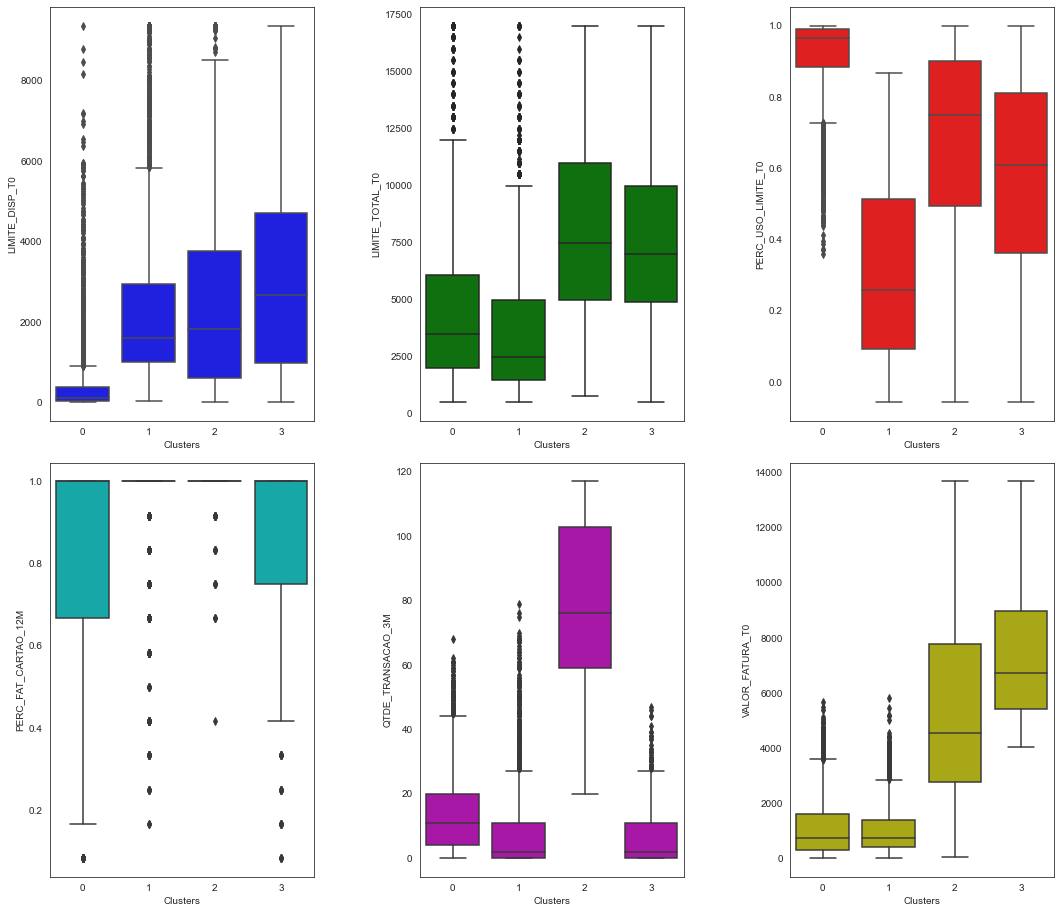

In [37]:
fig, axes = plt.subplots(2, 3, figsize = (18,16)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.4) #ajustando as distâncias estre os gráficos


colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

var = [i for i in df.columns if i not in ['ward_cluster', 'kmeans_cluster'] ]

for i, col in enumerate(var):
    
    #Transformando uma variável em duas para plotar os gráficos no grid 2x3.
    x, y = round(i/4), i%3
    
    #ploting the boxplots
    sns.set_style(style = 'white')
    sns.boxplot(ax= axes[x, y], data=df , x ='ward_cluster', y = col,color=colors[i])
    axes[x, y].set_xlabel('Clusters')

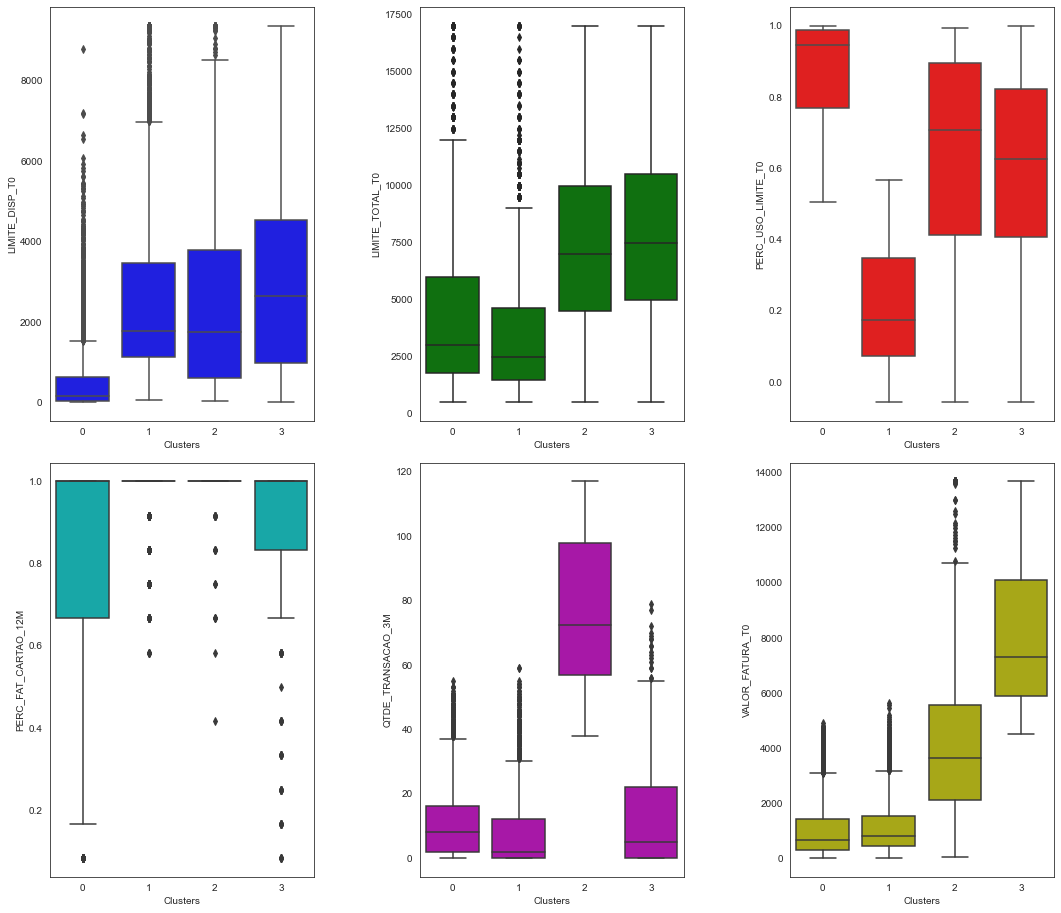

In [38]:
fig, axes = plt.subplots(2, 3, figsize = (18,16)) #criando os subplots com 1 linha e 6 colunas
fig.subplots_adjust(hspace=0.1, wspace=0.4) #ajustando as distâncias estre os gráficos


colors = ['b', 'g', 'r', 'c', 'm', 'y'] #set de cores utilizados para plotar os gráficos

var = [i for i in df.columns if i not in ['ward_cluster', 'kmeans_cluster'] ]

for i, col in enumerate(var):
    
    #Transformando uma variável em duas para plotar os gráficos no grid 2x3.
    x, y = round(i/4), i%3
    
    #ploting the boxplots
    sns.set_style(style = 'white')
    sns.boxplot(ax= axes[x, y], data=df , x ='kmeans_cluster', y = col,color=colors[i])
    axes[x, y].set_xlabel('Clusters')

In [31]:
print(df.ward_cluster.value_counts())
print('________________________________\n')
print(df.kmeans_cluster.value_counts())

1    3936
0    3867
2     974
Name: ward_cluster, dtype: int64
________________________________

2    4714
0    3190
1     873
Name: kmeans_cluster, dtype: int64
